In [3]:
import numpy as np
import time
from skimage import data as sdata, io, util, transform, feature, color


In [72]:
loadData = lambda rep : np.array([ color.rgb2gray(e) \
                                  for e in io.imread_collection(rep)])


In [97]:
data = loadData('/home/oxygene/DEV/SY32/TD04/images/*')

Fonction qui prend une image  en paramètre et retourne desc.shape[0]*desc.shape[1] (P x Q) vecteurs descripteur de l'image de taille 200 . Selon la taille de l'image, le nombre de vécteurs (ou mots visuel) est différent. d_data vas donc avoir tous les mots visuel de toute les images à la suite.

In [134]:
def daisy_data(im):
    desc = feature.daisy(im,step=16,radius=32,rings=3,histograms=8,orientations=8)
    return np.reshape(desc,(desc.shape[0]*desc.shape[1],desc.shape[2]),order='F')

probleme pour obtenir un data frame avec tout les vecteur de taille 200 à la suite. nb_desc[i] garde en mémoire combien de vecteurs pour l'image i.

In [280]:
d_data = np.empty((0, 200))
nb_desc = np.zeros(300)
i=0
for im in data:
    im_descs = daisy_data(im)
    d_data = np.append(d_data, im_descs, axis=0)
    nb_desc[i] = len(im_descs)
    i+=1

In [281]:
print(len(nb_desc), d_data.shape)

300 (52712, 200)


In [172]:
from sklearn import cluster

In [272]:
K = 20

In [273]:
import time
t = time.time()
kmeans = cluster.KMeans(n_clusters=K)
kmeans.fit(d_data)
print(time.time() - t)

37.30454969406128


Il ya 253800 vecteurs au total et donc autant de label (entre 0 et K). Il faut donc pour chaque image construire l'histograme des labels de 0 à K

In [290]:
labels = kmeans.labels_
kmeans.labels_.shape

(52712,)

In [ ]:
#nombre de vecteurs par image i en int
nb_desc = nb_desc.astype(int)

In [289]:
np.bincount(labels[0:nb_desc[0]],minlength =20) / np.sum(np.bincount(labels[0:nb_desc[0]],minlength =20))

array([0.175     , 0.        , 0.01666667, 0.09166667, 0.175     ,
       0.14166667, 0.        , 0.        , 0.        , 0.06666667,
       0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [284]:
nb_vect = 0
descr_hist = np.zeros((300,K))

for i in range(300):
    # comptage des K labels pour chaque images i
    nb_vect_start = np.sum(nb_desc[:i])
    nb_vect_stop = np.sum(nb_desc[:i + 1])
    descr_hist[i,:] = np.bincount(labels[nb_vect_start:nb_vect_stop],minlength = K)
    #normalisation par le nombre de vecteurs dans l'image
    descr_hist[i,:] /= nb_desc[i]

In [295]:
descr_hist[0,:]

array([0.175     , 0.        , 0.01666667, 0.09166667, 0.175     ,
       0.14166667, 0.        , 0.        , 0.        , 0.06666667,
       0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [291]:
import matplotlib.pyplot as plt

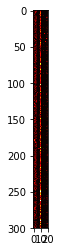

In [296]:
plt.imshow(descr_hist, cmap='hot', interpolation='nearest')
plt.show()